<a href="https://colab.research.google.com/github/anshulrath0re/Multiple_Linear_regression_from_scratch/blob/main/MLR_Sratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preparing Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data ML/Student_Performance.csv')   #.values
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# X = data[:, :-1]
# y = data[:, -1]

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [4]:
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]])

In [5]:
y

array([91., 65., 45., ..., 74., 95., 64.])

# Data Splitting

adding new row for bias, Warning: run only once otherwise multiple rows will be added

In [6]:
sample_size = X.shape[0]
row = np.ones((X.shape[0], 1), dtype = X.dtype)
X = np.hstack((X, row))

suffling and splitting

In [7]:
indices = np.arange(sample_size)
np.random.seed(42)
np.random.shuffle(indices)
train_idx = indices[int(sample_size*0.2):]
test_idx = indices[:int(sample_size*0.2)]
X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]
# row = np.ones((X_train.shape[0], 1), dtype = X_train.dtype)
# X_train = np.hstack((X_train, row))

In [8]:
print(X_train)

[[ 5 49  0  7  5  1]
 [ 2 48  1  7  6  1]
 [ 2 81  0  7  2  1]
 ...
 [ 9 48  0  7  6  1]
 [ 1 47  0  9  0  1]
 [ 2 46  0  6  6  1]]


In [ ]:
print(y_train)

[36. 25. 59. ... 44. 20. 24.]


In [95]:
print(X_test)

[[ 5 69  0 ...  2  1  1]
 [ 2 46  1 ...  8  1  1]
 [ 7 56  1 ...  5  1  1]
 ...
 [ 2 40  1 ...  2  1  1]
 [ 3 83  0 ...  5  1  1]
 [ 5 60  0 ...  4  1  1]]


In [ ]:
print(y_test)

[51. 20. 46. ... 16. 65. 47.]


Initializing Random Weights

In [11]:
w = np.array([0,1,0,0,0,0])

In [13]:
print(w)

[0 1 0 0 0 0]


# MSE Cost Function



In [14]:
def MSE(w_mse, X_mse, y_mse):
  sample_size = X_mse.shape[0]
  y__ = X_mse.dot(w_mse)
  error_sq = (y__ - y_mse)**2
  return np.mean(error_sq)/2

In [15]:
print(MSE(w,X_test,y_test))

130.71675


# Finding global maxima without gradient decent

In [16]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [184]:
print(MSE(w, X_train, y_train))

2.0848679247625035


#Batch Gradient Decent

In [ ]:
w_n = np.array([  2.7692274 ,   0.99092617,   0.34468219,   0.21847469,
         0.13087183, -29.47951022])

In [163]:
w_n = np.array([0,1,0,0,0,0])

In [197]:
# def Gradient_Decent(w, X, y, i =0):
for j in range (1000000):
  alpha = 0.0001
  y_d = X_train.dot(w_n)
  dj_dw = (X_train.T.dot(y_train - y_d))/len(y_train)
  w_n = w_n +alpha*dj_dw

In [199]:
# print(MSE(w, X_train, y_train))
print(MSE(w_n, X_train, y_train))

2.1399187713137735


In [198]:
print(w_n)

[  2.81358072   1.00481022   0.48528822   0.35616791   0.16334689
 -31.84613267]


# Mini batch Gradient decent


In [193]:
wn = np.array([0,1,0,0,0,0])

In [194]:
for j in range(2000):
  for i in range(800):
    alpha = 0.00001
    Xb = X_train[i*10 : (i+1)*10]
    yb = y_train[i*10 : (i+1)*10]
    djdw = Xb.T.dot(Xb.dot(wn) - yb)
    wn = wn -alpha*djdw

In [195]:
print(MSE(wn, X_train, y_train))

2.1151291985322938


In [166]:
print(wn)

[  2.84647635   1.01660168   0.57682182   0.44535181   0.18043412
 -33.35340887]


# Stochastic Gradient Decent

In [189]:
w_s = np.array( [0,1,0,0,0,0])

In [185]:
for j in range(800):
  alpha = 0.0001
  for i in range(8000):
    x = X_train[i]
    ytemp = y_train[i]
    dj__dw = x.T.dot(x.dot(w_s) - ytemp)
    w_s = w_s - alpha*dj__dw

In [187]:
print(w_s)

[  2.89567682   1.01639387   0.70668657   0.5112329    0.18164037
 -34.04001655]


In [188]:
print(MSE(w_s, X_train, y_train))

2.134158275918667


# Test Data Visualisation

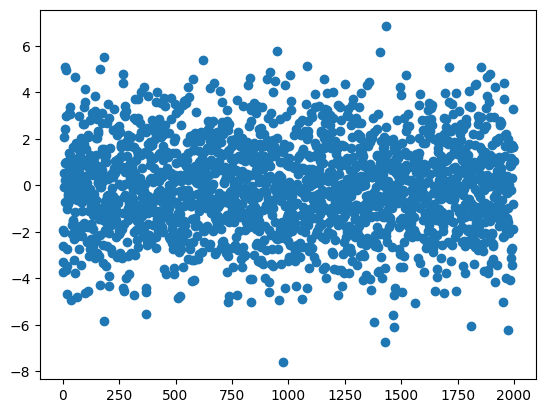

In [ ]:
y_d = X_test.dot(w)
plt.figure()
plt.scatter(range(2000),y_test- y_d)
plt.show()

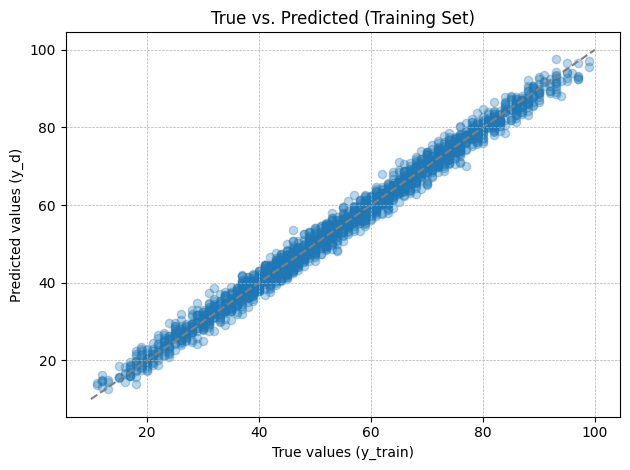

In [ ]:
min_val = min(y_train.min(), y_d.min())
max_val = max(y_train.max(), y_d.max())

# Plot
plt.figure()
plt.scatter(y_test, y_d, alpha=0.3)

plt.plot([min_val, max_val], [min_val, max_val], color='grey', linestyle='--')
plt.xlabel('True values (y_train)')
plt.ylabel('Predicted values (y_d)')
plt.title('True vs. Predicted (Training Set)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()